## Notebook setup

In [40]:
import os
import io
import warnings
import datetime
import numpy as np
import base64

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

from IPython.display import HTML

# import sys
# sys.path.append('../../')

from openbb_terminal.api import widgets
from openbb_terminal.api import openbb
from openbb_terminal.helper_classes import TerminalStyle

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
warnings.filterwarnings("ignore")

# Detect if prediction capabilities are present. If they are not, disable prediction in the rest of the script
# so that the report can still be generated without prediction results.
# predictions = True
# try:
#     openbb.stocks.pred.models
# except Exception as e:
#     predictions = False

# TODO Fix predictions virtual path on api refactored

predictions = False

In [41]:
try:
    theme = TerminalStyle("light", "light", "light")
except:
    pass
stylesheet = widgets.html_report_stylesheet()
with open("OpenBB_reports_logo.png", "rb") as image_file:
    openbb_image_encoded = base64.b64encode(image_file.read())

## Select symbol

In [42]:
# Parameters that will be replaced when calling this notebook
symbol = "TSLA"
report_name = ""

In [43]:
if "." in symbol:
    import sys

    sys.exit(0)

In [44]:
ticker_data = openbb.stocks.load(
    symbol=symbol, start_date=datetime.datetime.now() - datetime.timedelta(days=4 * 30)
)
ticker_data = openbb.stocks.process_candle(df=ticker_data)

author = "Didier Rodrigues Lopes"
report_title = f"INVESTMENT RESEARCH REPORT ON {symbol.upper()}"
report_date = datetime.datetime.now().strftime("%d %B, %Y")
report_time = datetime.datetime.now().strftime("%H:%M")
report_timezone = datetime.datetime.now(datetime.timezone.utc).astimezone().tzinfo
report_title, report_date, report_time, report_timezone

Loading Daily TSLA stock with starting period 2022-04-27 for analysis.

('INVESTMENT RESEARCH REPORT ON TSLA',
 '25 August, 2022',
 '15:30',
 datetime.timezone(datetime.timedelta(seconds=3600), 'GMT Daylight Time'))

In [45]:
info = openbb.stocks.fa.info(symbol=symbol).transpose()

if info["Long business summary"][0] != "NA":
    overview = info["Long business summary"][0]
else:
    overview = info["Long name"][0]
overview

'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warranties and extended service plans. The Energy Generation and Storage segment engages in the design, manufac

## Data

In [46]:
(
    df_year_estimates,
    df_quarter_earnings,
    df_quarter_revenues,
) = openbb.stocks.dd.est(symbol=symbol)

In [47]:
display_year = sorted(df_year_estimates.columns.tolist())[:3]
df_year_estimates = df_year_estimates[display_year].head(5)
df_year_estimates

,2022,2023,2024
YEARLY ESTIMATES,,,
Revenue,"85,190","120,867","154,610"
Dividend,0.00,0.00,0.00
Dividend Yield (in %),-,-,-
EPS,12.29,18.03,22.12
P/E Ratio,72.36,49.33,40.20


In [ ]:
df_quarter_revenues

In [ ]:
(
    df_major_holders,
    df_institutional_shareholders,
    df_mutualfund_shareholders,
) = openbb.stocks.fa.shrs(symbol)
df_institutional_shareholders.index += 1

In [ ]:
df_sec_filings = openbb.stocks.dd.sec(symbol=symbol)[
    ["Type", "Category", "Link"]
].head(5)
df_sec_filings["Link"] = df_sec_filings["Link"].apply(
    lambda x: f'<a href="{x}">{x}</a>'
)
df_sec_filings

,Type,Category,Link
Filing Date,,,
08/05/2022,8-K,Special Events,"<a href=""https://www.marketwatch.com/investing/stock/tsla/financials/secfilings?docid=15996693"">https://www.marketwatch.com/investing/stock/tsla/financials/secfilings?docid=15996693</a>"
07/25/2022,10-Q,Quarterly Reports,"<a href=""https://www.marketwatch.com/investing/stock/tsla/financials/secfilings?docid=15962560"">https://www.marketwatch.com/investing/stock/tsla/financials/secfilings?docid=15962560</a>"
07/20/2022,8-K,Special Events,"<a href=""https://www.marketwatch.com/investing/stock/tsla/financials/secfilings?docid=15957404"">https://www.marketwatch.com/investing/stock/tsla/financials/secfilings?docid=15957404</a>"
07/05/2022,8-K,Special Events,"<a href=""https://www.marketwatch.com/investing/stock/tsla/financials/secfilings?docid=15929600"">https://www.marketwatch.com/investing/stock/tsla/financials/secfilings?docid=15929600</a>"
06/23/2022,DEF 14A,Proxy Statement,"<a href=""https://www.marketwatch.com/investing/stock/tsla/financials/secfilings?docid=15908062"">https://www.marketwatch.com/investing/stock/tsla/financials/secfilings?docid=15908062</a>"


In [51]:
df_analyst = openbb.stocks.dd.analyst(symbol=symbol)
if not df_analyst.empty:
    if "target" in df_analyst.columns:
        df_analyst["target_to"] = df_analyst["target_to"].combine_first(
            df_analyst["target"]
        )
    df_analyst = df_analyst[["category", "analyst", "rating", "target_to"]].rename(
        columns={
            "category": "Category",
            "analyst": "Analyst",
            "rating": "Rating",
            "target_to": "Price Target",
        }
    )
df_analyst

,Category,Analyst,Rating,Price Target
date,,,,
2022-07-19,Resumed,Credit Suisse,Outperform,1000.0
2022-07-14,Initiated,Truist,Buy,1000.0
2022-07-13,Resumed,Canaccord Genuity,Buy,801.0
2022-06-24,Reiterated,Credit Suisse,Outperform,1000.0
2022-06-13,Upgrade,RBC Capital Mkts,Sector Perform -> Outperform,1100.0


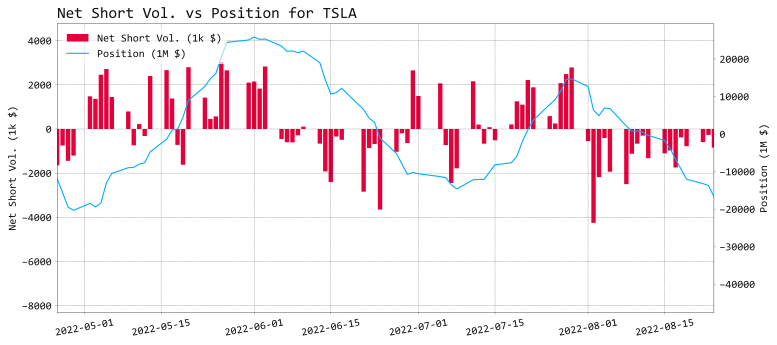

In [52]:
fig, ax1 = plt.subplots(figsize=(11, 5), dpi=150)
ax2 = ax1.twinx()
openbb.stocks.dps.spos(
    symbol=symbol,
    limit=84,
    raw=False,
    export="",
    external_axes=[ax1, ax2],
    chart=True,
)
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
net_short_position = f.getvalue().decode("utf-8")

Could not get data

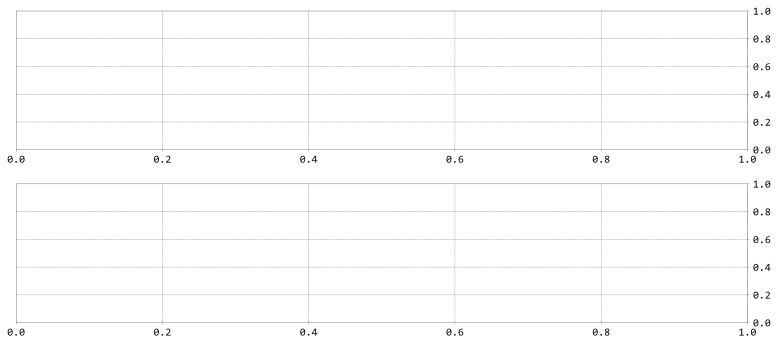

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.stocks.dps.dpotc(
    symbol=symbol,
    external_axes=[ax1, ax2],
    chart=True
)
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
dark_pools = f.getvalue().decode("utf-8")

In [54]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
ax3 = ax1.twinx()
openbb.stocks.dps.psi_sg(
    symbol=symbol,
    external_axes=[ax1, ax2, ax3],
    chart=True,
)
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
price_vs_short_interest = f.getvalue().decode("utf-8")

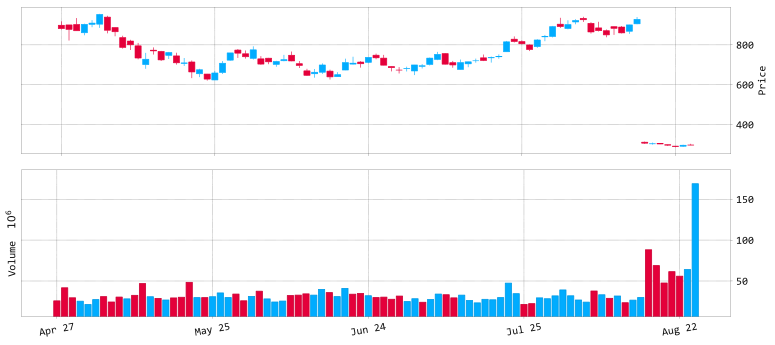

In [55]:
fig, (candles, volume) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.stocks.candle(
    symbol=symbol,
    data=ticker_data,
    use_matplotlib=True,
    external_axes=[candles, volume],
    chart=True,
)
candles.set_xticklabels("")
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
price_chart = f.getvalue().decode("utf-8")

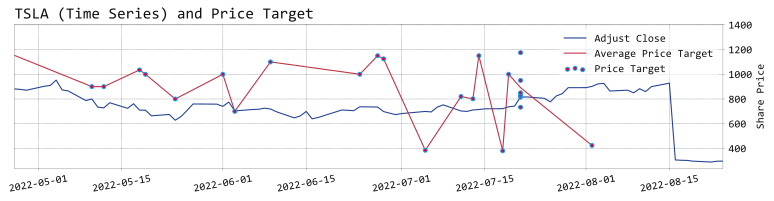

In [56]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.dd.pt(
    symbol=symbol,
    start_date="2022-01-01",
    data=ticker_data,
    limit=10,
    raw=False,
    external_axes=[ax],
    chart=True
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
price_target_chart = f.getvalue().decode("utf-8")

In [57]:
df = openbb.stocks.dd.pt(symbol=symbol)
avg_ratings_last_30_days= 0
if not df.empty:
    avg_ratings_last_30_days = round(
        np.mean(
            df[datetime.datetime.now() - datetime.timedelta(days=30) :][
                "Price Target"
            ].values
        ),
        2,
    )
last_price = round(ticker_data["Close"][-1], 2)

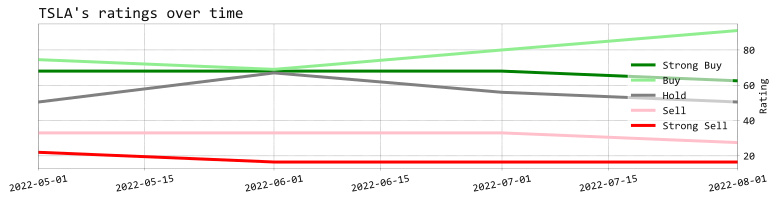

In [58]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.dd.rot(
    symbol=symbol,
    limit=10,
    raw=False,
    export="",
    external_axes=[ax],
    chart=True
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
ratings_over_time_chart = f.getvalue().decode("utf-8")

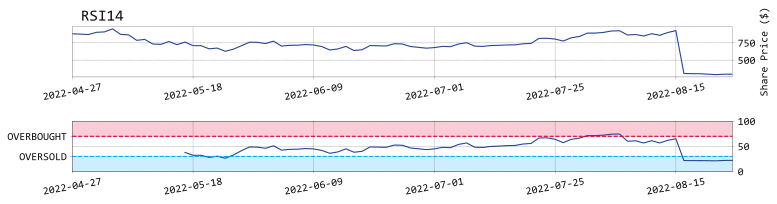

In [59]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 3), dpi=150)
openbb.common.ta.rsi(
    ticker_data["Close"], external_axes=[ax1, ax2], chart=True
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
ta_rsi = f.getvalue().decode("utf-8")

In [60]:
df = openbb.common.ta.rsi(ticker_data["Close"])
rsi_value = round(df.values[-1][0], 2)
rsi_value

22.13

In [61]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(
    np.array(range(len(ticker_data["Close"][-30:].index))).reshape(-1, 1),
    ticker_data["Close"][-30:].values,
)
regression_slope = round(model.coef_[0], 2)

In [62]:
import pandas as pd

df_insider = pd.DataFrame.from_dict(
    openbb.stocks.ins.lins(symbol=symbol)
).head(10)
df_insider["Val ($)"] = df_insider["Value ($)"].replace({",": ""}, regex=True)
df_insider["Trade"] = df_insider.apply(
    lambda row: (-1 * float(row["Val ($)"]))
    if row["Transaction"] == "Sale"
    else (float(row["Val ($)"]) if row["Transaction"] == "Buy" else 0),
    axis=1,
)
last_10_insider_trading = round(sum(df_insider["Trade"]) / 1_000_000, 2)
df_insider = df_insider.drop(columns=["Val ($)", "Trade"])
df_insider

,Relationship,Transaction,#Shares,Cost,Value ($),#Shares Total,Insider Trading,SEC Form 4
Date,,,,,,,,
Aug 01,Director,Option Exercise,"8,750",44.95,"393,312","10,550",Wilson-Thompson Kathleen,Aug 02 08:17 PM
Aug 01,Director,Sale,"8,750",904.00,"7,910,000","1,800",Wilson-Thompson Kathleen,Aug 02 08:17 PM
Jul 29,Director,Option Exercise,"17,500",44.95,"786,625","19,300",Wilson-Thompson Kathleen,Aug 02 08:17 PM
Jul 29,Director,Sale,"17,500",863.78,"15,116,150","1,800",Wilson-Thompson Kathleen,Aug 02 08:17 PM
Jul 27,SVP Powertrain and Energy Eng.,Option Exercise,"3,500",62.72,"219,520","24,067",Baglino Andrew D,Jul 29 08:34 PM
Jul 27,SVP Powertrain and Energy Eng.,Sale,"3,500",791.50,"2,770,250","20,567",Baglino Andrew D,Jul 29 08:34 PM
Jul 25,Director,Option Exercise,"25,000",74.17,"1,854,250","536,240",Musk Kimbal,Jul 27 08:31 PM
Jun 27,SVP Powertrain and Energy Eng.,Option Exercise,"3,500",62.72,"219,520","24,067",Baglino Andrew D,Jun 29 07:05 PM
Jun 27,SVP Powertrain and Energy Eng.,Sale,"3,500",748.11,"2,618,385","20,567",Baglino Andrew D,Jun 29 07:05 PM


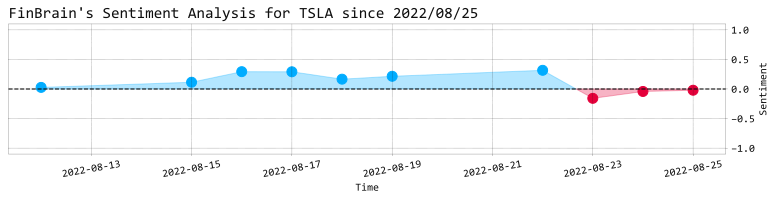

In [63]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.ba.headlines(symbol=symbol, external_axes=[ax], chart=True)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
finbrain_sentiment = f.getvalue().decode("utf-8")

In [64]:
df_sentiment_finbrain = openbb.stocks.ca.sentiment(
    symbols=[symbol]
)
finbrain_sentiment_val = float(df_sentiment_finbrain.values[-1][0])

In [65]:
(
    watchlist_count,
    n_cases,
    n_bull,
    n_bear,
) = openbb.stocks.ba.bullbear(symbol=symbol)
stocktwits_sentiment = f"Watchlist count: {watchlist_count}</br>"
if n_cases > 0:
    stocktwits_sentiment += f"\nLast {n_cases} sentiment messages:</br>"
    stocktwits_sentiment += f"Bullish {round(100*n_bull/n_cases, 2)}%</br>"
    stocktwits_sentiment += f"Bearish {round(100*n_bear/n_cases, 2)}%"
else:
    stocktwits_sentiment += "No messages found"

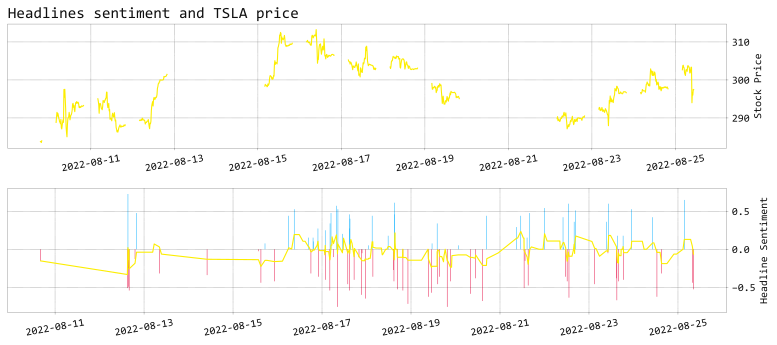

In [66]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.stocks.ba.snews(symbol, external_axes=[ax1, ax2],chart=True)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
snews = f.getvalue().decode("utf-8")

In [67]:
ticker_data_all = openbb.stocks.load(
    symbol=symbol, start_date=datetime.datetime.now() - datetime.timedelta(days=5 * 12 * 21)
)
ticker_data_all["Returns"] = ticker_data_all["Adj Close"].pct_change()

Loading Daily TSLA stock with starting period 2019-03-14 for analysis.

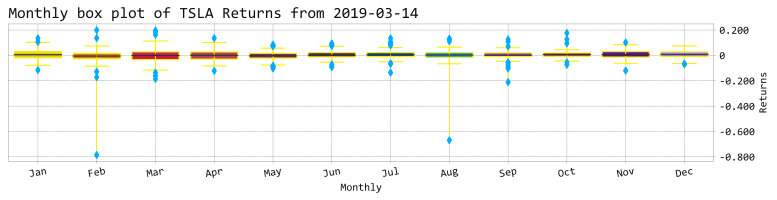

In [68]:
# Deprecated in the new API

# fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
# openbb.stocks.qa.bw(symbol, ticker_data_all, "Returns", False, external_axes=[ax])
# fig.tight_layout()
# f = io.BytesIO()
# fig.savefig(f, format="svg")
# bw_month = f.getvalue().decode("utf-8")

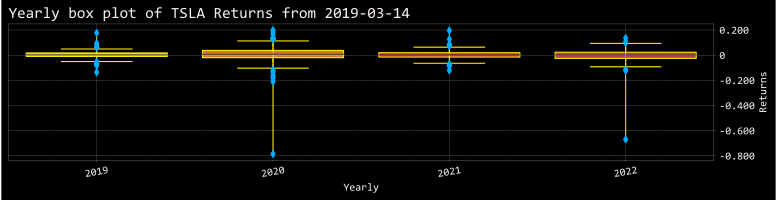

In [69]:
# Deprecated in the new API

# fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
# openbb.stocks.qa.bw(symbol, ticker_data_all, "Returns", True, external_axes=[ax])
# fig.tight_layout()
# f = io.BytesIO()
# fig.savefig(f, format="svg")
# bw_year = f.getvalue().decode("utf-8")

In [70]:
# TODO Fix predictions virtual path on api refactored

if predictions:
    regression_val = round(
        openbb.stocks.pred.models.regression.get_regression_model(
            ticker_data_all["Close"], 1, 80, 20, 1
        )[0][-1],
        2,
    )
    regression_val

In [71]:
# TODO Fix predictions virtual path on api refactored

if predictions:
    fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
    openbb.stocks.pred.regression(
        symbol, ticker_data_all["Close"], 1, 80, 20, 1, external_axes=[ax]
    )
    fig.tight_layout()
    f = io.BytesIO()
    fig.savefig(f, format="svg")
    regression = f.getvalue().decode("utf-8")

In [72]:
# TODO Fix predictions virtual path on api refactored

if predictions:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11, 3), dpi=150)
    openbb.stocks.pred.mc(ticker_data["Close"], 30, 100, external_axes=[ax1, ax2])
    fig.tight_layout()
    f = io.BytesIO()
    fig.savefig(f, format="svg")
    mc = f.getvalue().decode("utf-8")

In [73]:
if predictions:
    fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
    openbb.stocks.pred.regression(
        symbol, ticker_data_all["Close"], 1, 80, 20, 1, external_axes=[ax]
    )
    fig.tight_layout()
    f = io.BytesIO()
    fig.savefig(f, format="svg")
    regression = f.getvalue().decode("utf-8")

## Render the report template to a file

In [74]:
body = ""

img = f'<img src="data:image/png;base64,{openbb_image_encoded.decode()}" alt="OpenBB" style="width:144px;">'
body += widgets.header(
    img,
    author,
    report_date,
    report_time,
    report_timezone,
    f"<b>INVESTMENT RESEARCH REPORT:</b> {symbol}",
)

body += widgets.tablinks(
    [
        "SUMMARY",
        "Overview",
        "Analyst Opinions",
        "Fundamental Analysis",
        "Dark Pool and Shorts",
        "Technical Analysis",
        "Insider Trading",
        "Behavioural Analysis",
        "Quantitative Analysis",
        "Prediction Techniques",
    ]
)

htmlcode = widgets.h(3, "KPIs")
htmlcode += widgets.kpi(
    [last_price],
    [
        "Last closing price is above the average price ratings of last 30 days",
        "Average price ratings of last 30 day is above last closing price",
    ],
    avg_ratings_last_30_days,
)
if predictions:
    htmlcode += widgets.kpi(
        [0],
        [
            "Regression (dollars per market day) on last 30 market days is negative",
            "Regression (dollars per market day) on last 30 market days is positive",
        ],
        regression_slope,
    )
htmlcode += widgets.kpi(
    [30, 70],
    ["RSI level is oversold", "RSI level is normal", "RSI level is overbought"],
    rsi_value,
)
htmlcode += widgets.kpi(
    [0],
    [
        "The sum of last 10 insider trading (in millions) was negative",
        "The sum of last 10 insider trading (in millions) was positive",
    ],
    last_10_insider_trading,
)
htmlcode += widgets.kpi(
    [-0.1, 0.1],
    [
        "Last FinBrain sentiment is bearish",
        " Last FinBrain sentiment is neutral",
        "Last FinBrain sentiment is bullish",
    ],
    finbrain_sentiment_val,
)
if predictions:
    htmlcode += widgets.kpi(
        [0],
        [
            "The regression for the next 20th market price is below closing price",
            "The regression for the next 20th market price is above closing price",
        ],
        round(regression_val - last_price, 2),
    )
body += widgets.add_tab("Summary", htmlcode)

htmlcode = widgets.row([price_chart])
htmlcode += widgets.row(
    [widgets.h(3, "Description") + widgets.p(overview)]
)
body += widgets.add_tab("Overview", htmlcode)

htmlcode = widgets.row([price_target_chart])
htmlcode += widgets.row([ratings_over_time_chart])
htmlcode += widgets.row([df_analyst.to_html()])
body += widgets.add_tab("Analyst Opinions", htmlcode)

htmlcode = widgets.row(
    [widgets.h(3, "Estimates") + df_year_estimates.head().to_html()]
)
htmlcode += widgets.row(
    [widgets.h(3, "Earnings") + df_quarter_earnings.head().to_html()]
)
htmlcode += widgets.row(
    [widgets.h(3, "Revenues") + df_quarter_revenues.head().to_html()]
)
htmlcode += widgets.row(
    [widgets.h(3, "Major Institutional Shareholders") + df_institutional_shareholders.head().to_html()]
)
htmlcode += widgets.row(
    [widgets.h(3, "SEC filings") + df_sec_filings.to_html(escape=False)]
)
body += widgets.add_tab("Fundamental Analysis", htmlcode)

htmlcode = widgets.row([net_short_position])
htmlcode += widgets.row([price_vs_short_interest])
htmlcode += widgets.row([dark_pools])
body += widgets.add_tab("Dark Pool and Shorts", htmlcode)

body += widgets.add_tab("Technical Analysis", widgets.row([ta_rsi]))

htmlcode = widgets.row(
    [
        widgets.h(3, "Last Activity")
        + df_insider.head(10).to_html(col_space="75px")
    ]
)
body += widgets.add_tab("Insider Trading", htmlcode)

htmlcode = widgets.row([finbrain_sentiment])
htmlcode += widgets.row([snews])
htmlcode += widgets.row(
    [widgets.h(3, "Stocktwits") + stocktwits_sentiment]
)
body += widgets.add_tab("Behavioural Analysis", htmlcode)

# Deprecated in the new API
htmlcode = widgets.row([bw_month])
htmlcode += widgets.row([bw_year])
body += widgets.add_tab("Quantitative Analysis", htmlcode)

if predictions:
    htmlcode = widgets.row([regression])
    htmlcode += widgets.row([mc])
else:
    htmlcode = widgets.row(["Prediction features not enabled."])
body += widgets.add_tab("Prediction Techniques", htmlcode)

body += widgets.tab_clickable_evt()

report = widgets.html_report(title=report_name, stylesheet=stylesheet, body=body)

# to save the results
with open(report_name + ".html", "w", encoding="utf-8") as fh:
    fh.write(report)